# Ask

### 1.1 Business Understanding

PERDANA Swalayan is a wholesale market company that specializes in supplying a wide range of products . They operate in the wholesale market sector, serving as a primary source of goods for various types of customers.

### 1.2 Business Task

To analyze customer data in order to understand the purchasing behavior, preferences, and profile of the customers. The aim is to identify opportunities for targeted marketing, improve customer engagement, and increase sales.

### 1.3 Business Objective

**Developing Customer Segmentation**: make a nuanced understanding of different customer segments based on their purchasing behavior and preferences.

**Improve Customer Engagement**: Understand customer preferences and tailor marketing strategies to enhance customer experience and engagement.

**Reduce Customer Churn**: Identify factors that might lead to customer dissatisfaction and address them proactively to retain customers.

**Increase Sales**: Identify products and categories that are most popular among different customer segments to promote them effectively.

### 1.4 Deliverables

I.      clear summary of the business task

II.     description of all data sources used

III.    documentation of any cleaning or manipulation of data

IV.     summary of analysis

V.      supporting visualizations and key findings

IV.     high-level content recommendations based on the analysis


### 1.5 Key Stakeholders

Key Stakeholders:

1. Marketing Team: To tailor and optimize marketing strategies based on customer data.

2. Sales Team: To understand customer preferences and increase sales through targeted promotions and product recommendations.

3. Customer Support Team: To proactively address customer complaints and improve customer satisfaction.

4. Product Management Team: To align product offerings with customer preferences.

5. Senior Management: To make strategic decisions based on insights derived from customer data


# Data Preparation

### 2.1 Information of Data Documentation

 **People**

 ● ID:Customer's unique identifier

 ● Year_Birth: Customer's birth year

 ● Education: Customer's education level

 ● Marital_Status: Customer's marital status

 ● Income: Customer's yearly household income

 ● Kidhome: Number of children in customer's household

 ● Teenhome: Number of teenagers in customer's household

 ● Dt_Customer: Date of customer's enrollment with the company

 ● Recency: Number of days since customer's last purchase

 ● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

 **Products**

 ● MntWines: Amount spent on wine in last 2 years

 ● MntFruits: Amount spent on fruits in last 2 years

 ● MntMeatProducts: Amount spent on meat in last 2 years

 ● MntFishProducts: Amount spent on fish in last 2 years

 ● MntSweetProducts: Amount spent on sweets in last 2 years

 ● MntGoldProds: Amount spent on gold in last 2 years

 **Promotion**

 ● NumDealsPurchases: Number of purchases made with a discount

 ● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise

 ● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise

 ● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

 ● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

 ● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

 ● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
 Place

 ● NumWebPurchases: Number of purchases made through the company’s website

 ● NumCatalogPurchases: Number of purchases made using a catalog

 ● NumStorePurchases: Number of purchases made directly in stores

 ● NumWebVisitsMonth: Number of visits to the company’s website in the last month

It has total of column: 27

### 2.2 Basic Information about The Dataset

**ID**: Unique identifier for each customer

**Personal Information** Education, Marital Status, Income, Number of kids and teenagers at home, Date of enrollment, and Days since last purchase (Recency)

**Product Spending**: Amount spent on various product categories in the last 2 years

**Promotional Response**: Customer responses to various promotional campaigns

**Purchasing Behavior**: Information on how the purchases were made (web, catalog, store) and website visits in the last month

**Customer Segmentation and RFM Analysis**: Pre-calculated values for customer segmentation based on Recency, Frequency, and Monetary value


### 2.3 Limitations of Data Set

Data Consistency: There are additional columns that were not documented in the initial description. This includes columns like 'Age', 'Monetary', 'Frequency', 'TotalKids', 'R_rank_norm', 'F_rank_norm', 'M_rank_norm', 'RFM_Score', and 'Customer_segment'.

Data Types: Some of the columns have float data types, which might not be necessary for certain variables and could be converted to integers for consistency and to save memory.

Missing Values: There are no missing values in the dataset, which is a good sign for data quality. However, this should be verified for accuracy.

Data Accuracy: The accuracy of the pre-calculated values (e.g., 'RFM_Score' and 'Customer_segment') needs to be verified.

Data Relevance: All columns need to be evaluated for their relevance to the business objectives and task at hand.

Data Recency: The 'Dt_Customer' column indicates when the data was collected, which needs to be evaluated to ensure it is current and relevant for analysis.


### 2.4 ROCCC (Reliable, Objective, Comprehensive, Current, Cited)

Is the data ROCCC (Reliable, Objective, Comprehensive, Cited, and Current)?

**Reliable**       : We need to check the consistency of the data to ensure it’s reliable.

**Objective**       : The data seems objective as it includes various aspects of customer behavior and interactions.

**Comprehensive**   : The dataset includes a wide range of information, but we need to verify if it covers all relevant aspects.

**Cited**           :The source of the data is not mentioned, so this aspect needs to be clarified.

**Current**         : We need to check the date of the last entry to ensure the data is up-to-date.


### 2.4 Data Selection

data we selected for further analysis is 'SupermarketCustomer.csv'

### 2.5 Tools

we use python version 3.11.4  for data cleaning, data transforming, data analyzing and data visualization.

# Data Processing

### 3.1 initializing Environment

In [149]:
import matplotlib.gridspec as gridspec
from scipy.stats import mannwhitneyu
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')


### 3.2 Import Dataset

In [150]:
df = pd.read_csv('SupermarketCustomers.csv',delimiter=';')

### 3.3 Data Understanding

#### Show data

In [151]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Show data as Numerical or Categorical

In [152]:
print("Numerical Data")

display( df.select_dtypes(include=['number']).head())

print("\nCategorical Data")
display(df.select_dtypes(include=['object', 'category']).head())




Numerical Data


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0



Categorical Data


,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04/09/2012
1,Graduation,Single,08/03/2014
2,Graduation,Together,21/08/2013
3,Graduation,Together,10/02/2014
4,PhD,Married,19/01/2014


#### Show data dimension

In [153]:
#Menampilkan dimensi dari data
print(f'Total rows and columns of the data: {df.shape}\n')


Total rows and columns of the data: (2240, 29)



#### Show duplicated values

In [154]:
count_Dups = df.duplicated().sum()
print(f'Duplicated value found: {count_Dups}')

Duplicated value found: 0


#### Checking data_type, null_value, n_unique and describe data

In [155]:
cols = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

#Cols = columns of Supermarket Customers Data Dictionary given

pd.DataFrame({
    'feature': cols,
    'data_type': df[cols].dtypes.values,
    'null_value': df[cols].isna().mean().values * 100,
    'n_unique': df[cols].nunique().values,
    'sample_unique': [df[col].unique() for col in cols]}
)


,feature,data_type,null_value,n_unique,sample_unique
0,ID,int64,0.000000,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.000000,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.000000,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1.071429,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0.000000,3,"[0, 1, 2]"
6,Teenhome,int64,0.000000,3,"[0, 1, 2]"
7,Dt_Customer,object,0.000000,663,"[04/09/2012, 08/03/2014, 21/08/2013, 10/02/201..."
8,Recency,int64,0.000000,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0.000000,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


In [156]:
print("Describe Data")
df.describe().T


Describe Data


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [157]:
df.value_counts().head()

ID    Year_Birth  Education   Marital_Status  Income   Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0     1985        Graduation  Married         70951.0  0        0         04/05/2013   66       239       10         554              254              87                54            1                  3                4                    9                  1                  0             0             0             0             0             0         3              11         0           1
7373  1952        PhD         Divorced        46610.0  0        2         29/10/2012   8        96        12         96               33               22                43            6                  4      

In [158]:
print("Categorical columns\n")
# Making a list of all categorical variables
Category_columns = [
    "Education",
    "Marital_Status",
]

# Printing number of count of each unique value in each column
for column in Category_columns:
    print(df[column].value_counts())
    print("#" * 30)


Categorical columns

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
##############################
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
##############################


Findings:
1. there is null value in column of Income with 1.07 percentage relative to its overall income data.
2. Column of Dt_Customer have datatype of "Object" and need correction into datetime datatype.
3. drop columns of Z_CostContact and Z_Revenue, because it is such unnecessary column. It doesn't give any context and further information,
   jugding by their n_unique that only have one value.
4. there is bias information within column Education where Value of Master and 2n Cycle is literally same but have different 
   naming where italian commonly use 2n Cycle as education level that equavalent as master degree, same as the other values need to be correct after.
5. there is bias information within column Marital_Status where value of alone is equavalent as 
   Single and value of Absurd and YOLO has no 
   specific term and tend to confuse. 
5. Year_Birth has a large range of values i.e. 1893 to 1996.
6. The birth year <=1900 is some users seems It's very unlikely that the person is alive. It may be a reporting error. We will explore this further.
7. Change column Year_Birth into column Age to simplyfy data understanding then drop column Year_Birth.
8. income has max value of 666666 that's seems odd and too good to be true, need further exploration to decide whether it's an extreme value.
9. columns of Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds show an extreme values symptoms 
   because range between 75% percentile and it's max value is huge (potentially have outlier).

### 3.4 Data Cleaning and Manipulation

#### There are null_value within Income column

In [159]:
#sum of null_value of income column
df["Income"].isnull().sum()

24

before we decides whether we going to cut off the null_value jugding by it's blank value is still less than 5%

In [160]:
#Percentage of null_value on column Income
income_isnull = df["Income"].isna().mean()*100
income_isnull


1.0714285714285714

or we are going to fiil the null_Value using fillna().

let's us check if there is an outlier within values of income column

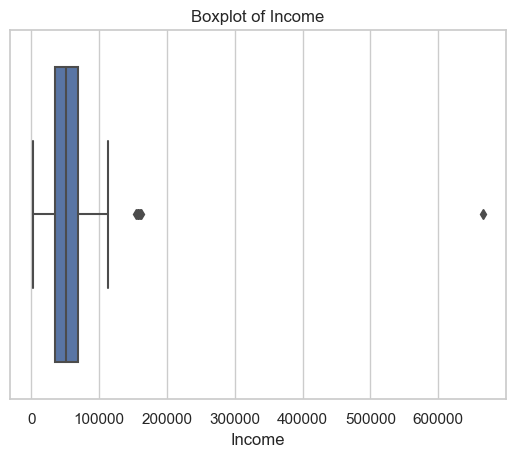

In [161]:
sns.boxplot(x='Income', data=df)
plt.title('Boxplot of Income')
plt.show()


In [162]:
df['Income'].max()

666666.0

as we can see there is an outlier within Income column and it's value from its max = 666666 would be sounds ridiculous if it is real though income is relative for each person.


concidering by our founding (outlier), we decide not to cut off null_Value because we want to keep other values that affected by null_values, so we going to fill the null_value using income median because it's robust to outlier.

In [163]:
#Fill_na Process
df['Income'].fillna(round(df['Income'].median()),inplace=True), 
fill_na_Income = df['Income'].isnull().sum()

#Data Validation on null_Value
print(f'null_value founded on Income column :{fill_na_Income}')

null_value founded on Income column :0


#### there is an anomaly within data type of DT_Customer

In [164]:
df['Dt_Customer'].dtypes
df['Dt_Customer'].head()

0    04/09/2012
1    08/03/2014
2    21/08/2013
3    10/02/2014
4    19/01/2014
Name: Dt_Customer, dtype: object

DT_Customer datatype initially is an object, then we going to change the dtype to datetime.

In [165]:
#Changing dytpe of object into datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')

#Data Validation
df['Dt_Customer'].describe()


count                             2240
mean     2013-07-11 22:57:38.571428608
min                2012-01-08 00:00:00
25%                2013-01-19 18:00:00
50%                2013-07-11 00:00:00
75%                2013-12-30 06:00:00
max                2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

#### Drop columns z_CostContact and z_Revenue

In [166]:
# To drop multiple columns
columns_to_drop = ['Z_CostContact', 'Z_Revenue']
df.drop(columns_to_drop, axis=1, inplace=True)

In [167]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

#### There is anomaly within unique value of Education column

In [168]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

there are inconsistency for naming value of education:
 1. 2n Cycle is same as Master degree, source: https://www.researchgate.net/figure/Selected-second-cycle-degree-programmes-in-Societal-Security_tbl3_350580985
 2. phD is as same as doctoral degree, source: https://www.uagc.edu/blog/what-difference-between-phd-and-doctorate
 3. basic is equavalent as diploma degree, it would be achieve in such younger age as it shown, source: https://educationdata.org/education-attainment-statistics
 4. Graduation is same as bachelor degree

In [169]:
# replace Education value
df['Education'] = df['Education'].replace(['PhD'], 'Doctor')
df['Education'] = df['Education'].replace(['2n Cycle'], 'Master')
df['Education'] = df['Education'].replace(['Basic'], 'Diploma')
df['Education'] = df['Education'].replace(['Graduation'], 'Bachelor')
df['Education'].value_counts()


Education
Bachelor    1127
Master       573
Doctor       486
Diploma       54
Name: count, dtype: int64

#### there is an anomaly within unique value of Marital_Status column

In [170]:
df['Marital_Status'].value_counts()


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

there are a confusion within value of single and alone because they both have the same term, so we going to included value of alone into single,
also Absurd and YOLO dont have a specific term, it tend to create a confusion for further analysis but we still want to keep the value categorized as "Others".

In [171]:
# replace value of alone into Single
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'], 'Single')

#replace values of absurd and YOLO into null
df['Marital_Status'] = df['Marital_Status'].replace({'Absurd': 'Others', 'YOLO': 'Others'})

#Data Validation
df['Marital_Status'].value_counts()


Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: count, dtype: int64

#### Erase column of 'Year_Birth' and add column of 'age' 

In [172]:
#Adding column of Age
yr = datetime.datetime.now().year
df['Age'] = round(yr-df['Year_Birth'])

In [173]:
#Dropping column of Year_Birth
df = df.drop('Year_Birth', axis=1)
df.head()


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,4,7,0,0,0,0,0,0,1,66
1,2174,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,2,5,0,0,0,0,0,0,0,69
2,4141,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,58
3,6182,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,4,6,0,0,0,0,0,0,0,39
4,5324,Doctor,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,42


#### Add new column of Monetary

Monetary column is sum of  amount goods purchased by customer such as MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

In [174]:
# create a new columns with Monetary:
totalA = [col for col in df.columns if 'Mnt' in col]
df['Monetary'] = df[totalA].sum(axis=1)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Monetary
0,5524,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,1,66,1617
1,2174,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,0,69,27
2,4141,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,58,776
3,6182,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,0,39,53
4,5324,Doctor,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,42,422


#### Add new column of Frequency

Frequency column is sum of transactions made via NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases by customers.

In [175]:
#create new column with total transactions
quant = [col for col in df.columns if 'Purchases' in col]
df['Frequency'] = df[quant].sum(axis=1)
df.head()


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Monetary,Frequency
0,5524,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,1,66,1617,25
1,2174,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,0,69,27,6
2,4141,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,58,776,21
3,6182,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,0,39,53,8
4,5324,Doctor,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,42,422,19


#### Add new column of Total_kids

In [176]:
df['TotalKids'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Monetary,Frequency,TotalKids
0,5524,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,1,66,1617,25,0
1,2174,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,69,27,6,2
2,4141,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,58,776,21,0
3,6182,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,39,53,8,1
4,5324,Doctor,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,42,422,19,1


#### Add new column RFM_Score and Customer_Segment for RFM Analysis

##### Normalize value of RFM into rank

In [177]:
df['R_rank'] = df['Recency'].rank(ascending=False)
df['F_rank'] = df['Frequency'].rank(ascending=True)
df['M_rank'] = df['Monetary'].rank(ascending=True)

# Normalizing the rank of the customers into unit of 100
df['R_rank_norm'] = (df['R_rank'] / df['R_rank'].max()) * 100
df['F_rank_norm'] = (df['F_rank'] / df['F_rank'].max()) * 100
df['M_rank_norm'] = (df['M_rank'] / df['M_rank'].max()) * 100

df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

df.head()


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,Age,Monetary,Frequency,TotalKids,R_rank_norm,F_rank_norm,M_rank_norm
0,5524,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,1,66,1617,25,0,40.691669,89.263393,92.007144
1,2174,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,69,27,6,2,61.351898,15.446429,7.055146
2,4141,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,58,776,21,0,73.568381,75.044643,64.657290
3,6182,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,39,53,8,1,73.568381,26.941964,18.776513
4,5324,Doctor,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,42,422,19,1,5.232428,66.473214,51.797276


##### Create RFM score column

Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [178]:

df['RFM_Score'] = 0.15 * df['R_rank_norm'] + 0.28 * df['F_rank_norm'] + 0.57 * df['M_rank_norm']
df['RFM_Score'] *= 0.05

df = df.round(2)

df.head()


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Response,Age,Monetary,Frequency,TotalKids,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,5524,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,1,66,1617,25,0,40.69,89.26,92.01,4.18
1,2174,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,69,27,6,2,61.35,15.45,7.06,0.88
2,4141,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,58,776,21,0,73.57,75.04,64.66,3.45
3,6182,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,39,53,8,1,73.57,26.94,18.78,1.46
4,5324,Doctor,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,42,422,19,1,5.23,66.47,51.80,2.45


##### Create segmentation based on RFM Score

**Champions (RFM Score > 4.5)**: These are your top-tier customers who have recently made frequent, substantial purchases. It's essential to acknowledge and reward their loyalty because they can be early adopters for new products and play a pivotal role in promoting your brand.

**Potential Loyalists (RFM Score > 4)**: These customers are recent buyers with a moderate frequency of purchases and significant spending. Encourage them to transition into loyal customers or champions by offering membership or loyalty programs, and suggesting related products to enhance their purchases.

**New Customers (RFM Score > 3)**: These are customers with high RFM scores, but they are not frequent shoppers. To establish a strong relationship with them, provide onboarding support and exclusive offers to increase their visits and loyalty.

**At Risk Customers (RFM Score > 1.6)**: These customers used to make frequent, high-value purchases but haven't bought recently. To re-engage them, send personalized reactivation campaigns and present renewal options, along with relevant product recommendations, to stimulate another purchase.

**Can't Lose Them (RFM Score < 1.6)**: These are customers who were once frequent visitors and purchasers but have not been active lately. To win them back, offer tailored promotions, conduct surveys to understand their concerns, and prevent them from switching to a competitor.

In [179]:
#Segmenting customer behaviour using RFM Score
df["Customer_segment"] = np.where(df['RFM_Score'] >
                                      4.5, "Champions",
                                      (np.where(
                                          df['RFM_Score'] > 4,
                                          "Potential Loyalists",
                                          (np.where(
                                              df['RFM_Score'] > 3,
                                              "New Customers",
                                              np.where(df['RFM_Score'] > 1.6,
                                                       'at Risk Customers', 'Cannot Lose Them'))))))

#result of dataframe df_RFM created
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,Age,Monetary,Frequency,TotalKids,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,5524,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,1,66,1617,25,0,40.69,89.26,92.01,4.18,Potential Loyalists
1,2174,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,69,27,6,2,61.35,15.45,7.06,0.88,Cannot Lose Them
2,4141,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,58,776,21,0,73.57,75.04,64.66,3.45,New Customers
3,6182,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,39,53,8,1,73.57,26.94,18.78,1.46,Cannot Lose Them
4,5324,Doctor,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,42,422,19,1,5.23,66.47,51.80,2.45,at Risk Customers


#### Normality & Outlier checking

##### Describe data

In [180]:
display(df.describe().T, df.describe(include=object))

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Income,2240.0,52237.980804,1730.0,35538.75,51382.0,68289.75,666666.0,25037.955707
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-11 22:57:38.571428608,2012-01-08 00:00:00,2013-01-19 18:00:00,2013-07-11 00:00:00,2013-12-30 06:00:00,2014-12-06 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373
MntFishProducts,2240.0,37.525446,0.0,3.0,12.0,50.0,259.0,54.628979


,Education,Marital_Status,Customer_segment
count,2240,2240,2240
unique,4,6,5
top,Bachelor,Married,New Customers
freq,1127,864,680


##### Normality test (Histogram)

KeyboardInterrupt: 

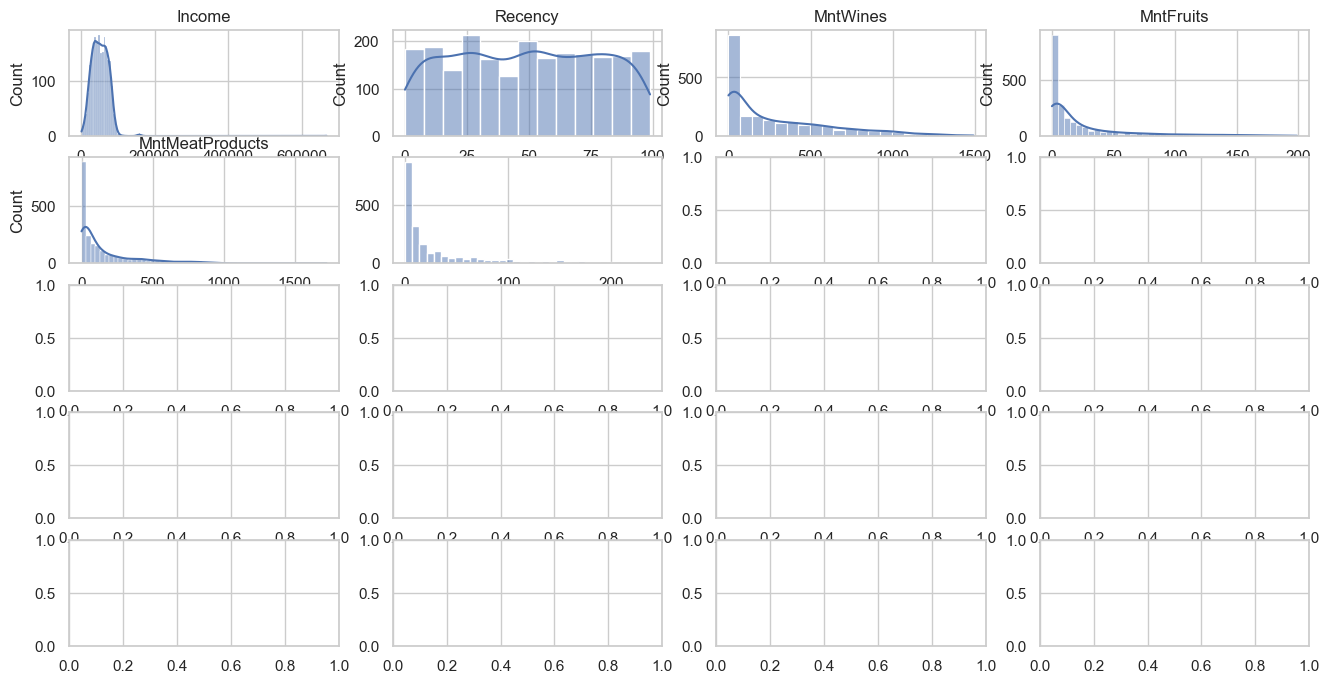

In [181]:
columns = ['Income','Recency', 
           'MntWines', 'MntFruits', 
           'MntMeatProducts','MntFishProducts', 
           'MntSweetProducts', 'MntGoldProds',
           'NumDealsPurchases', 'NumWebPurchases', 
           'NumCatalogPurchases','NumStorePurchases', 
           'NumWebVisitsMonth','Age', 
           'Monetary', 'Frequency', 
           'TotalKids','RFM_Score']

# Create a subplot grid
fig, axes = plt.subplots(5, 4, figsize=(16, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms for each column
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, label=column, ax=ax)
    ax.set_title(column)

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

##### Checking for outlier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


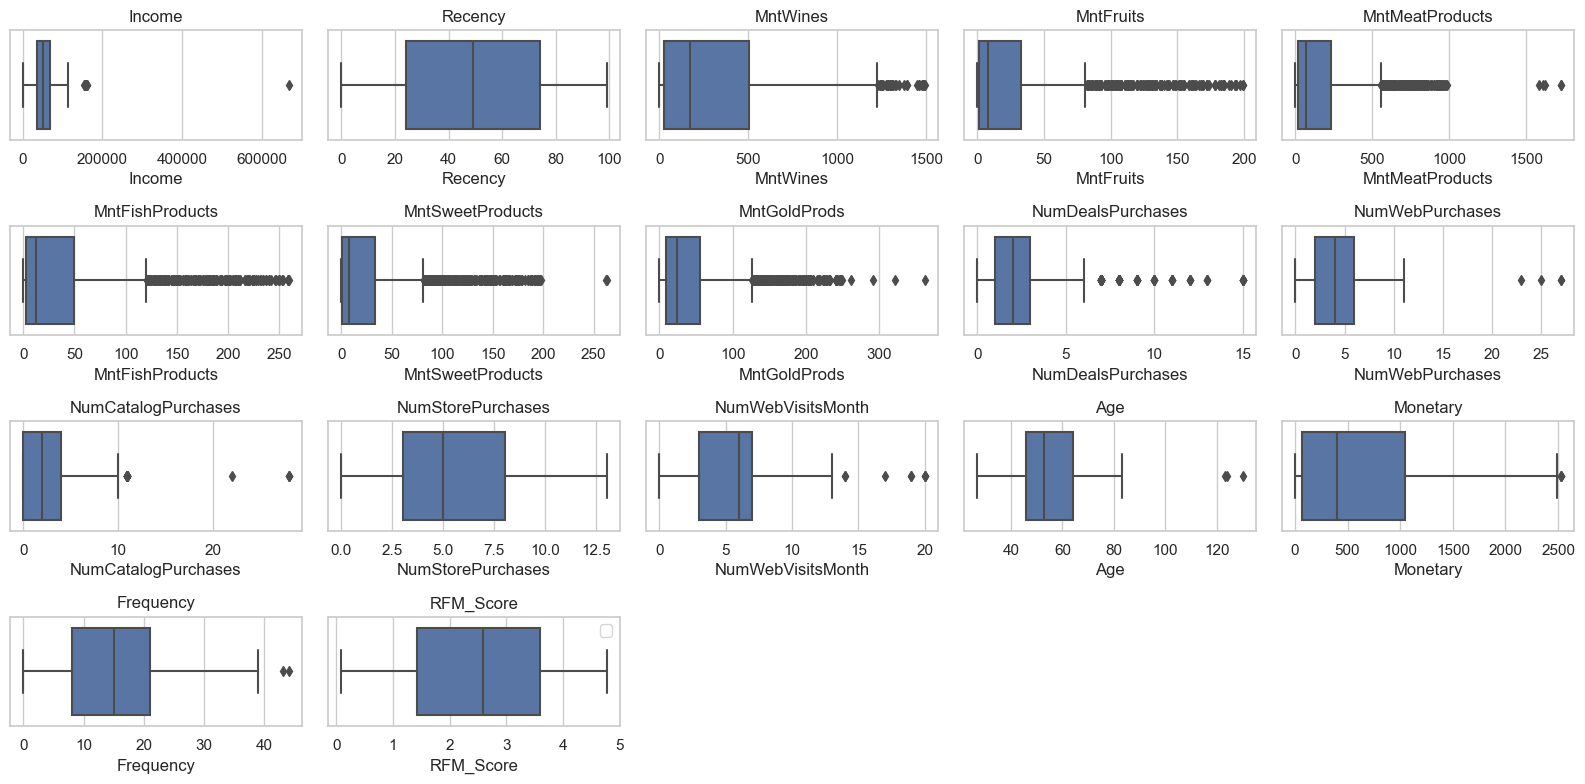

In [ ]:
#outlier check using seaborn
columns_to_process = ['Income', 'Recency',
                      'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Age',
                      'Monetary', 'Frequency', 'RFM_Score']
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
for i, column in enumerate(columns_to_process):
    plt.subplot(4, 5, i + 1)  # Create a grid of 3 rows and 4 columns
    sns.boxplot(data=df, x=column)
    plt.title(column)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
columns_to_process = ['Income', 'Recency',
                      'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Age',
                      'Monetary', 'Frequency',
                      'TotalKids', 'RFM_Score']

# Define a function to calculate and create the table


def create_outlier_table(df, column):
    # Calculate the lower and upper bounds for outliers using the IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count the number of outliers and non-outliers
    outliers = len(df[(df[column] < lower_limit) | (df[column] > upper_limit)])
    no_outliers = len(df[(df[column] >= lower_limit)
                      & (df[column] <= upper_limit)])

    # Determine if the column has outliers
    is_outlier = "Yes" if outliers > 0 else "No"

    # Calculate the percentage of outliers
    outlier_percentage = (outliers / (outliers + no_outliers)) * 100

    return {
        "Column Name": column,
        "Is_Outlier": is_outlier,
        "Lower_Limit": lower_limit,
        "Upper_Limit": upper_limit,
        "Outlier": outliers,
        "Outlier_Percentage": outlier_percentage,
        "No_Outlier": no_outliers,
    }


# Create an empty list to store the outlier information for each column
outlier_info = []

# Iterate through the columns and calculate the outlier information
for column in columns_to_process:
    info = create_outlier_table(df, column)
    outlier_info.append(info)

# Create a DataFrame from the list of outlier information
outlier_table = pd.DataFrame(outlier_info)

# Display the outlier information table
outlier_table


,Column Name,Is_Outlier,Lower_Limit,Upper_Limit,Outlier,Outlier_Percentage,No_Outlier
0,Income,Yes,-13587.750,117416.250,8,0.357143,2232
1,Recency,No,-51.000,149.000,0,0.000000,2240
2,MntWines,Yes,-697.000,1225.000,35,1.562500,2205
3,MntFruits,Yes,-47.000,81.000,227,10.133929,2013
4,MntMeatProducts,Yes,-308.000,556.000,175,7.812500,2065
5,MntFishProducts,Yes,-67.500,120.500,223,9.955357,2017
6,MntSweetProducts,Yes,-47.000,81.000,248,11.071429,1992
7,MntGoldProds,Yes,-61.500,126.500,207,9.241071,2033
8,NumDealsPurchases,Yes,-2.000,6.000,86,3.839286,2154
9,NumWebPurchases,Yes,-4.000,12.000,4,0.178571,2236


##### Handling Outliear

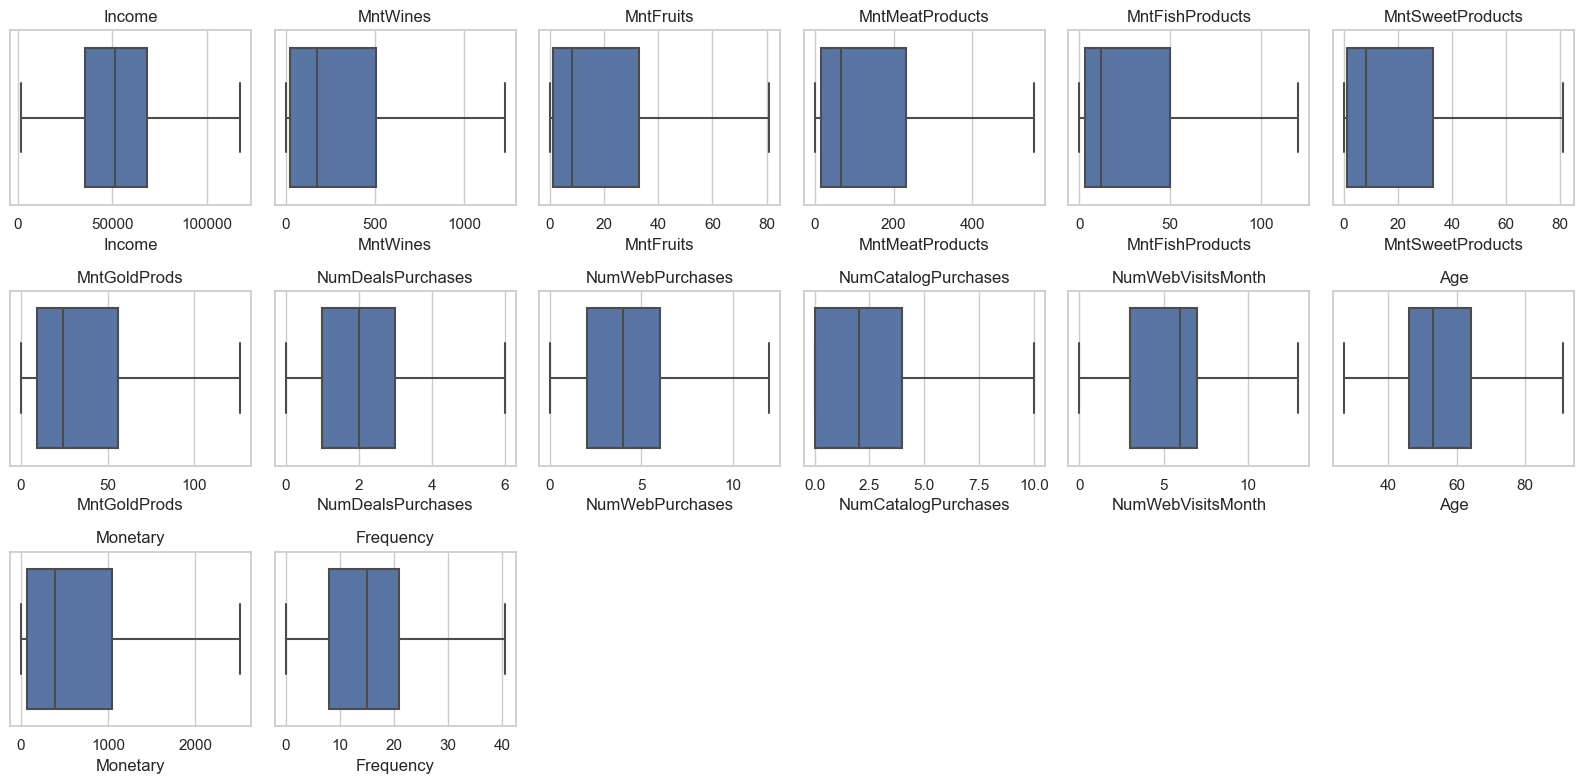

In [ ]:
columns_to_process = ['Income',
                      'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases',
                      'NumWebVisitsMonth', 'Age',
                      'Monetary', 'Frequency']

# Define a function to insert outliers using upper and lower bounds
def insert_outliers_with_bounds(df, column_name, threshold=1.5):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    df_copy = df.copy()  # Create a copy of the DataFrame
    df_copy.loc[df_copy[column_name] < lower_bound, column_name] = lower_bound
    df_copy.loc[df_copy[column_name] > upper_bound, column_name] = upper_bound

    return df_copy


# Apply the function to insert outliers for the specified columns
for column in columns_to_process:
    df = insert_outliers_with_bounds(df, column)

# Create boxplots after inserting outliers
plt.figure(figsize=(16, 8))
for i, column in enumerate(columns_to_process):
    plt.subplot(3, 6, i + 1)  # Create a grid of 3 rows and 6 columns
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()


##### Normality test Using Kolmogorov-Smirnov and shown as histogram

The fundamental concept of the Kolmogorov-Smirnov normality test involves comparing the distribution of the data being tested for normality with a standard normal distribution. The standard normal distribution is data that has been transformed into Z-scores and is assumed to be normally distributed. So, in essence, the Kolmogorov-Smirnov test is a test of differences between the data being tested for normality and the standard normal data. 

Ref: Conover, W. J. (1999). Practical Nonparametric Statistics (3rd ed.). Wiley. Chapter 13: Goodness of Fit Tests for Continuous Data.

Similar to a typical hypothesis test, if the significance level is below 0.05, it indicates a significant difference, whereas if the significance level is above 0.05, it suggests that there is no significant difference. The application in the Kolmogorov-Smirnov test is that if the significance level is below 0.05, it means that the data being tested significantly differs from the standard normal data, indicating that the data is not normally distributed. 
In a Kolmogorov-Smirnov (KS) normality test, the null hypothesis (Ho) and the alternative hypothesis (Ha) are formulated as follows:

Null Hypothesis (Ho): The data follows a normal distribution.

Alternative Hypothesis (Ha): The data does not follow a normal distribution.

In statistical notation:

Ho: Data follows a normal distribution.

Ha: Data does not follow a normal distribution.

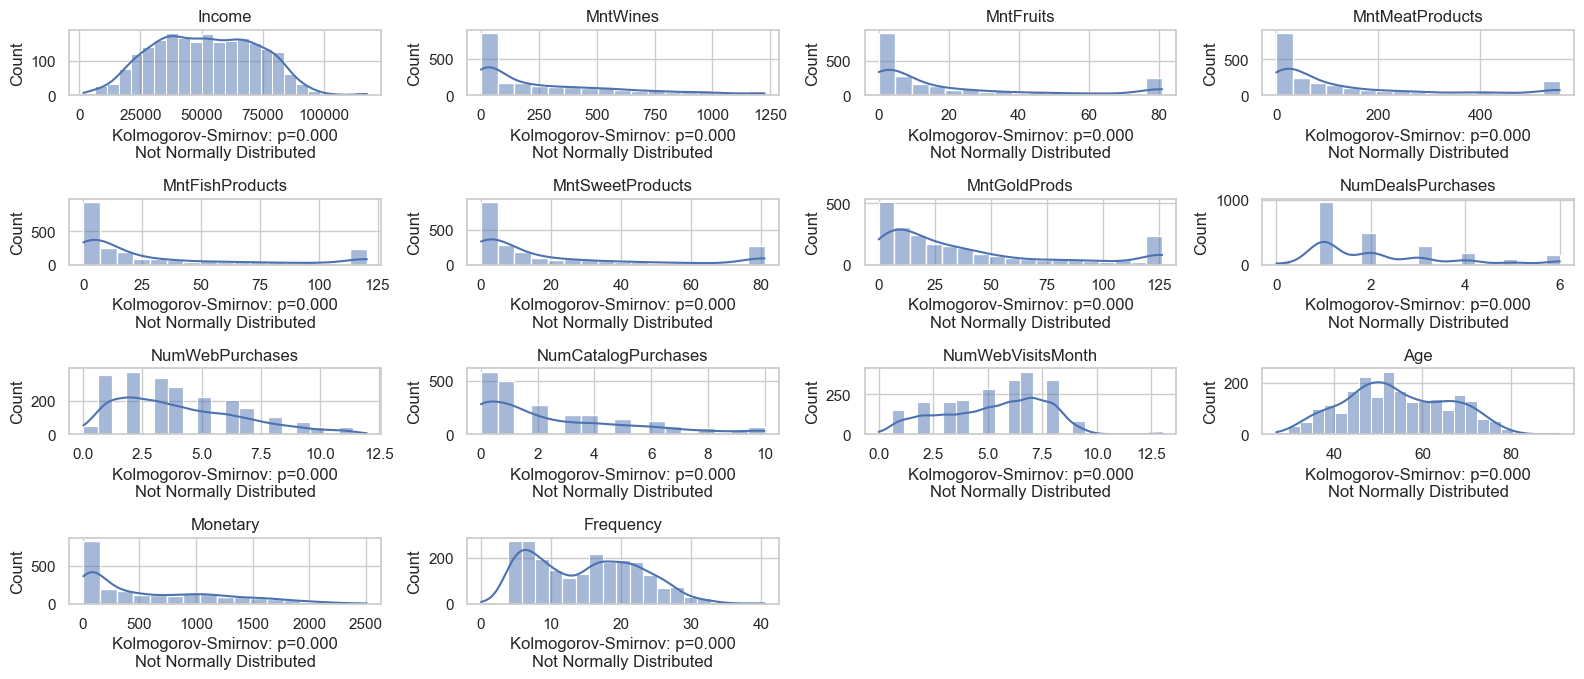

In [ ]:
columns = ['Income',
                      'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases',
                      'NumWebVisitsMonth', 'Age',
                      'Monetary', 'Frequency']

# Create a subplot grid
fig, axes = plt.subplots(5, 4, figsize=(16, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Perform the Kolmogorov-Smirnov test for each column and create histograms
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, label=column, ax=ax)
    ax.set_title(column)

    # Perform Kolmogorov-Smirnov test
    statistic, p_value = stats.kstest(df[column], 'norm')

    if p_value > 0.05:
        ax.set_xlabel(
            f"Kolmogorov-Smirnov: p={p_value:.3f}\nNormally Distributed")
    else:
        ax.set_xlabel(
            f"Kolmogorov-Smirnov: p={p_value:.3f}\nNot Normally Distributed")

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Data Analysis

## 1. Developing Customer Behaviour by RFM Analysis


##### Describe data

In [ ]:
display(df.describe(), df.describe(include=object))

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Age,Monetary,Frequency,TotalKids,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,51865.879911,0.444196,0.506250,2013-07-11 22:57:38.571428608,49.109375,302.112946,21.679018,150.873214,32.115848,...,0.009375,0.149107,54.147768,605.779408,14.859375,0.950446,50.325433,50.021795,50.033567,2.503705
min,0.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.400000,0.110000,0.040000,0.090000
25%,2828.250000,35538.750000,0.000000,0.000000,2013-01-19 18:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,46.000000,68.750000,8.000000,0.000000,25.350000,26.940000,25.122500,1.430000
50%,5458.500000,51382.000000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,53.000000,396.000000,15.000000,1.000000,50.910000,49.350000,50.010000,2.590000
75%,8427.750000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,64.000000,1045.500000,21.000000,1.000000,75.790000,75.040000,75.030000,3.590000
max,11191.000000,117416.250000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1225.000000,81.000000,556.000000,120.500000,...,1.000000,1.000000,91.000000,2510.625000,40.500000,3.000000,100.000000,100.000000,100.000000,4.770000
std,3246.662198,20936.104697,0.538398,0.544538,NaN,28.962453,331.057356,27.257348,178.816658,40.361485,...,0.096391,0.356274,11.771725,602.189559,7.667679,0.751803,29.047196,28.844973,28.880044,1.205545


,Education,Marital_Status,Customer_segment
count,2240,2240,2240
unique,4,6,5
top,Bachelor,Married,New Customers
freq,1127,864,680


##### RFM Analysis 

**RFM Analysis** is abbreviation for recency, frequency, monetary analysis: a marketing tool used to analyse customer behaviour in terms of how recently they have made a purchase, how frequently they have done so, and how much money they have spent. 

**Recency**: How recently has the customer made a transaction with us

**Frequency**: How frequent is the customer in ordering/buying some product from us

**Monetary**: How much does the customer spend on purchasing products from us

---

**the analysis means to categorizing customer behaviour into 5 categories:**

**Champions (RFM Score > 4.5)**: These are your top-tier customers who have recently made frequent, substantial purchases. It's essential to acknowledge and reward their loyalty because they can be early adopters for new products and play a pivotal role in promoting your brand.

**Potential Loyalists (RFM Score > 4)**: These customers are recent buyers with a moderate frequency of purchases and significant spending. Encourage them to transition into loyal customers or champions by offering membership or loyalty programs, and suggesting related products to enhance their purchases.

**New Customers (RFM Score > 3)**: These are customers with high RFM scores, but they are not frequent shoppers. To establish a strong relationship with them, provide onboarding support and exclusive offers to increase their visits and loyalty.

**At Risk Customers (RFM Score > 1.6)**: These customers used to make frequent, high-value purchases but haven't bought recently. To re-engage them, send personalized reactivation campaigns and present renewal options, along with relevant product recommendations, to stimulate another purchase.

**Can't Lose Them (RFM Score < 1.6)**: These are customers who were once frequent visitors and purchasers but have not been active lately. To win them back, offer tailored promotions, conduct surveys to understand their concerns, and prevent them from switching to a competitor.

---

RFM Analysis overview:

In [ ]:
df["Customer_segment"].value_counts()

Customer_segment
New Customers          680
Cannot Lose Them       662
at Risk Customers      657
Potential Loyalists    220
Champions               21
Name: count, dtype: int64

##### Pie Chart: Percentage of Customer Segmentation

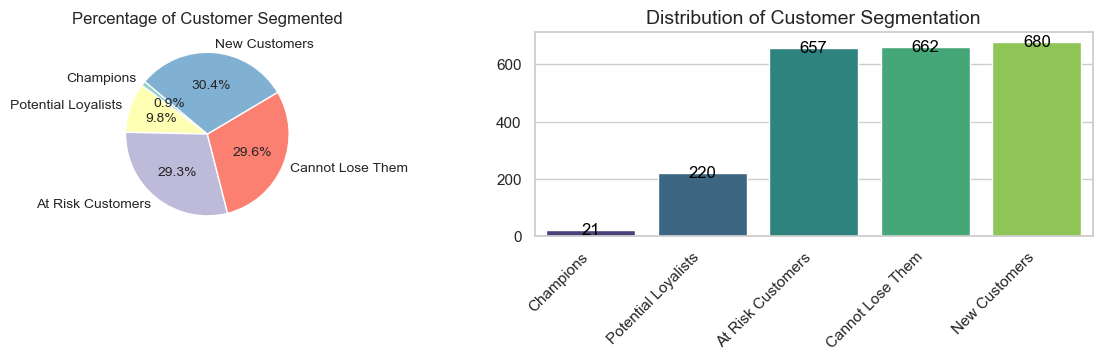

In [ ]:
# Sample data for the charts
labels = ['Champions', 'Potential Loyalists',
          'At Risk Customers', 'Cannot Lose Them', 'New Customers']
sizes = [21, 220, 657, 662, 680]

# Create a figure with a 2x2 grid layout
plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2)

# Create a pie chart in the top-left grid cell
plt.subplot(gs[0, 0])
colors = sns.color_palette('Set3', len(labels))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 10})  # Adjust the font size
plt.title('Percentage of Customer Segmented')

# Create a bar chart in the top-right grid cell
plt.subplot(gs[0, 1])
data = [21, 220, 657, 662, 680]
sns.set(style='whitegrid')
ax = sns.barplot(x=labels, y=data, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
ax.set_title('Distribution of Customer Segmentation', fontsize=14)

# Add numbers on top of each bar
for p, label in zip(ax.patches, data):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


**Insight**: The largest segments are "New Customers" (30.4%), "Cannot Lose Them" (29.6%), and "At Risk Customers" (29.3%). This indicates that a significant portion of the customer base is either new or at risk of churning.

**Recommendation**: 

Focus on converting "New Customers" to loyal customers and implement retention strategies for "At Risk Customers" and "Cannot Lose Them."

Allocate resources and marketing efforts according to the size and value of each segment. For instance, implement loyalty programs for "Potential Loyalists" and "Champions," and create re-engagement campaigns for "At Risk Customers" and "Cannot Lose Them."

Champions: These are your best customers. Keep them engaged, recommend your latest products, and appreciate them. They could potentially help in acquiring new customers.

Potential Loyalists: They have a good potential to become your Champions. Engage them, understand their needs, and provide them value.

At Risk Customers: They used to purchase frequently but haven’t purchased recently. Bring them back with relevant promotions or surveys to understand their needs.

Cannot Lose Them: They made big purchases, and used to purchase often, but haven’t returned recently. It’s crucial to bring them back and understand their reasons for not purchasing.

New Customers: They have recently made their first purchase. Provide them a good onboarding experience, and start building a relationship to encourage a second purchase.

## 2. Improve Customer Engagement

To improve customer engagement, we need to delve into the purchase behavior of different customer segments and analyze feedback and complaints.

### 2.1 Purchase Behavior

#### Analysis of Purchase Frequency and Recency

**Purchase Frequency**: This refers to how often customers make a purchase within a given period.

**Recency**: This refers to how recently a customer made a purchase (day).

We can analyze these aspects by creating segments based on the Recency and NumPurchases (total number of purchases across all channels).

In [ ]:
# Calculating total number of purchases across all channels
df['NumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Analysis of Purchase Frequency and Recency
purchase_frequency = df.groupby('Customer_segment')['NumPurchases'].mean()
recency = df.groupby('Customer_segment')['Recency'].mean()


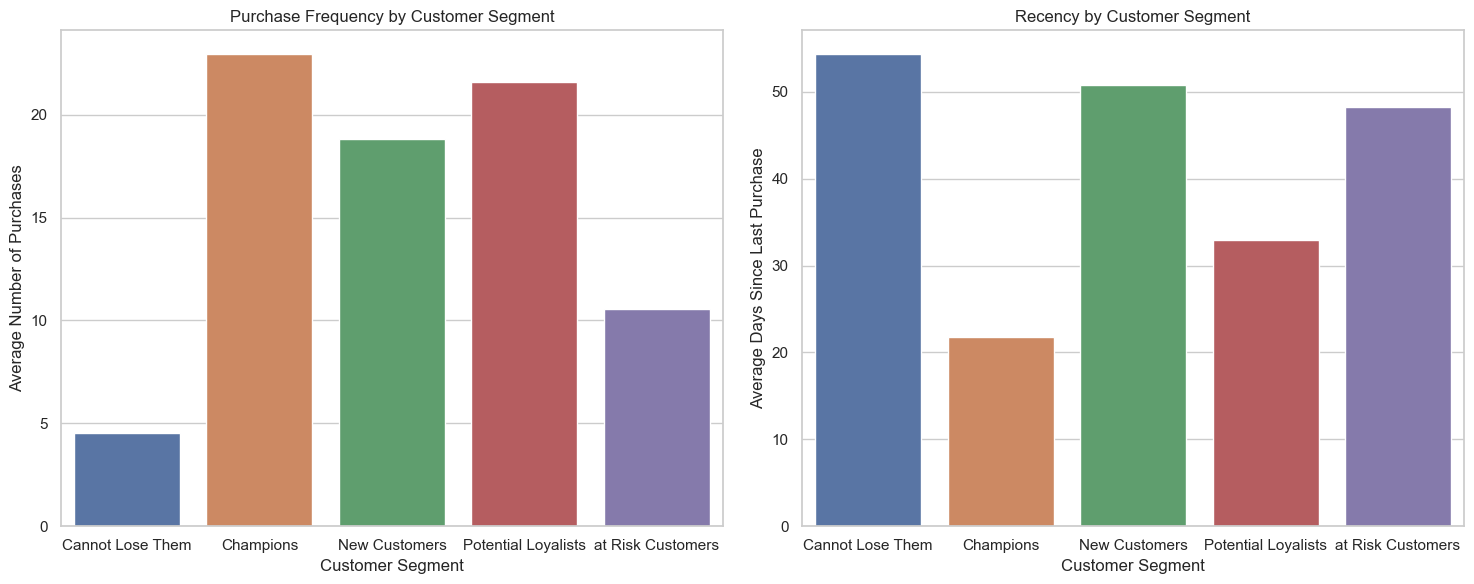

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, ax=ax1)
sns.barplot(x=recency.index, y=recency.values, ax=ax2)

ax1.set_title('Purchase Frequency by Customer Segment')
ax1.set_ylabel('Average Number of Purchases')
ax1.set_xlabel('Customer Segment')

ax2.set_title('Recency by Customer Segment')
ax2.set_ylabel('Average Days Since Last Purchase')
ax2.set_xlabel('Customer Segment')

plt.tight_layout()
plt.show()


**Insights**:

**Variation in Purchase Behavior**: Different customer segments exhibit distinct purchase behaviors in terms of how often they make purchases and how recently they have interacted with the brand.

**High-Value Segments**: Segments with higher purchase frequencies and more recent interactions are likely to be more engaged and possibly more loyal to the brand.

**Low-Engagement Segments**: Segments with lower purchase frequencies and less recent interactions might be at risk of churning or may require re-engagement strategies.

---

**Recommendations**:

**Loyalty Programs for High-Value Segments**: Consider introducing or enhancing loyalty programs for segments that show high purchase frequencies and recent interactions to maintain their engagement and encourage repeat purchases.

**Personalized Communication**: Utilize personalized communication and promotions based on the purchase history and recency of interactions to increase relevance and engagement.

**Targeted Engagement for Low-Activity Segments**: Implement targeted marketing and engagement strategies for customer segments with lower purchase frequencies and less recent interactions to boost their engagement and prevent churn.


#### Analysis of Preferred Channels

**Preferred Channels**: Analyze which channels (web, catalog, store) are most popular among different customer segments.

Let’s start by calculating the total number of purchases across all channels and then proceed to analyze purchase frequency, recency, and preferred channels.

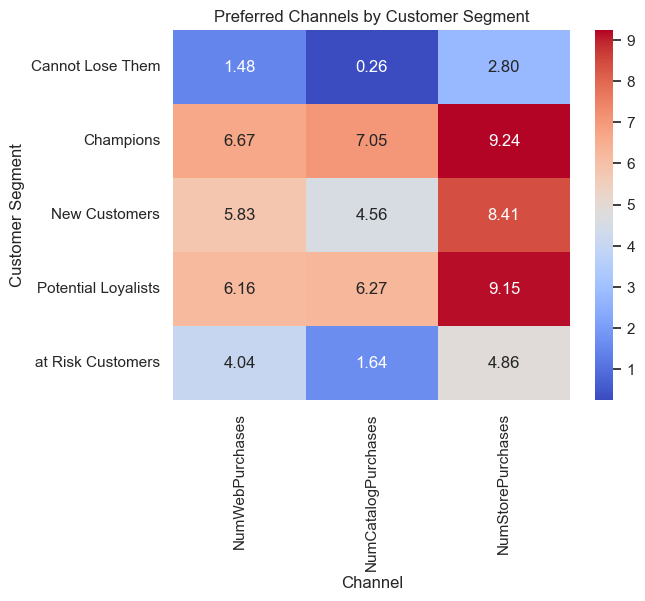

In [ ]:
channel_preferences = df.groupby('Customer_segment')[
    ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
sns.heatmap(channel_preferences, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Preferred Channels by Customer Segment')
plt.ylabel('Customer Segment')
plt.xlabel('Channel')
plt.show()


**Insights**:

Channel Preference: Identify which channel is preferred by each customer segment. For instance, if one segment has a higher average number of purchases in "NumCatalogPurchases," it indicates a preference for shopping through catalogs.

Variation Across Segments: Notice if there are significant variations in channel preferences across different customer segments.
High and Low Utilization: Identify which channels are highly utilized and which are underutilized across different segments.

---

**Recommendations**:

Targeted Marketing: Use the insights to tailor your marketing strategies for each segment. For example, if a segment prefers web purchases, focus your digital marketing efforts on them.

Enhance Preferred Channels: Invest in enhancing the user experience on the channels preferred by high-value segments.

Promote Underutilized Channels: Create incentives for customers to try underutilized channels, potentially opening up new revenue streams.


Personalized Communication: Send personalized communications and offers through the preferred channels of each segment.

Cross-Channel Promotion: Encourage customers to shop through various channels, potentially increasing their overall spend.



### 2.2 Compliants and Feedback

#### **Complaints**: Analyze the Complain column to understand the proportion of customers who have lodged complaints.

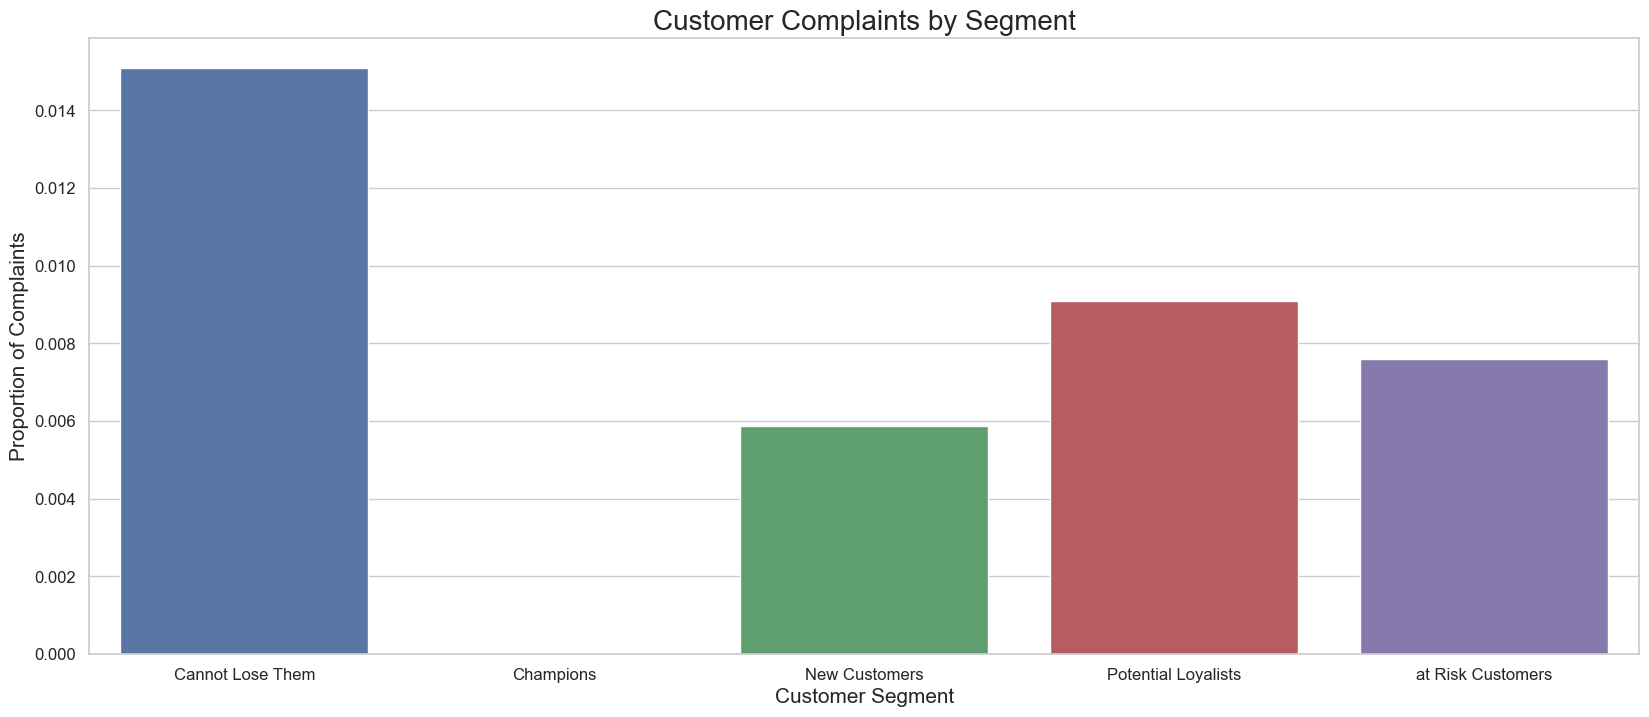

In [ ]:
# Plotting Customer Complaints by Segment
plt.figure(figsize=(20, 8))
complaints = df.groupby('Customer_segment')['Complain'].mean()
sns.barplot(x=complaints.index, y=complaints.values)
plt.title('Customer Complaints by Segment', fontsize=20)
plt.ylabel('Proportion of Complaints', fontsize=15)
plt.xlabel('Customer Segment', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Insights**:

Segment-Specific Complaint Rates: Identify which customer segments have the highest and lowest proportions of complaints. A higher proportion might indicate dissatisfaction or issues with the product/service for that particular segment.

Identify Problem Areas: If certain segments have significantly higher complaint rates, further analysis could help identify specific issues that need to be addressed.

Customer Satisfaction: The proportion of complaints can also be an indirect measure of customer satisfaction. Lower complaint rates might indicate higher satisfaction within a segment.

**Recommendations**:

Address Issues: For segments with high complaint rates, take immediate action to address the issues and improve customer satisfaction. This might involve reaching out to dissatisfied customers, improving product quality, or enhancing customer service.
Proactive Communication: For segments with higher complaints, implement proactive communication and check-ins to identify and solve issues before they escalate.

Training and Resources: Ensure that customer service teams are well-trained and have the necessary resources to address issues pertinent to segments with higher complaint rates.

Feedback Loop: Establish a feedback loop to continuously gather and analyze customer feedback, making it easier to identify and address issues promptly.

Incentivize Positive Behavior: For segments with low complaint rates, consider ways to incentivize and reward positive customer behavior, perhaps through loyalty programs or special promotions.

#### **Response to Campaigns**: Analyze the AcceptedCmpX columns to understand how different segments respond to various campaigns

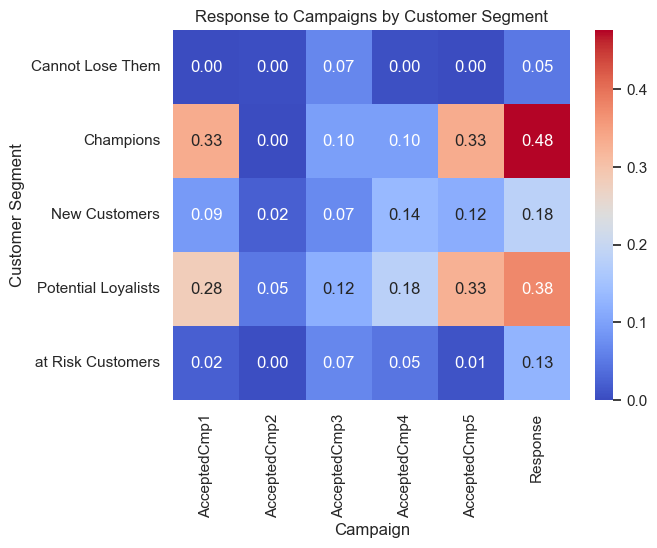

In [ ]:
response_to_campaigns = df.groupby('Customer_segment')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()
sns.heatmap(response_to_campaigns, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Response to Campaigns by Customer Segment')
plt.ylabel('Customer Segment')
plt.xlabel('Campaign')
plt.show()

**Insights**:

Differential Response Rates: Different customer segments have varying response rates to the campaigns. Identifying which segments respond more favorably to which campaigns can help in tailoring future marketing strategies.

High-Performing Campaigns: Some campaigns might be universally well-received across all segments, indicating successful campaign strategies that could be replicated in the future.

Low-Performing Campaigns: Conversely, campaigns with low acceptance rates across most segments may need to be reevaluated and potentially redesigned.

Segment-Specific Patterns: Certain customer segments may consistently respond better (or worse) to campaigns, highlighting opportunities for targeted marketing.

---

**Recommendations**:

Tailored Campaigns: Use the insights gained from the response patterns to tailor future campaigns to specific customer segments, enhancing relevance and effectiveness.

Improve Low-Performing Campaigns: Investigate why certain campaigns have low acceptance rates, especially if this trend is consistent across multiple customer segments. Consider revising the messaging, offer, or channel of these campaigns.

Leverage Successful Strategies: Identify the elements that make high-performing campaigns successful and consider how these elements can be applied to other campaigns or segments.

Segmentation Strategy: Strengthen your customer segmentation strategy by using the response data to better understand the preferences and behaviors of different segments.

Continuous Monitoring: Continuously monitor the response to campaigns across different segments, adjusting your strategies based on the evolving preferences and behaviors of your customer base.

## 3. Reduce Churn

To understand factors that might contribute to customer churn, we'll consider:

Customer complaints (Complain column).

Recency of customer's last purchase (Recency column), as longer durations since the last purchase may indicate decreased engagement.

Response to the latest campaign (Response column), which can help identify disengaged customers.


### **Customers Complaints**

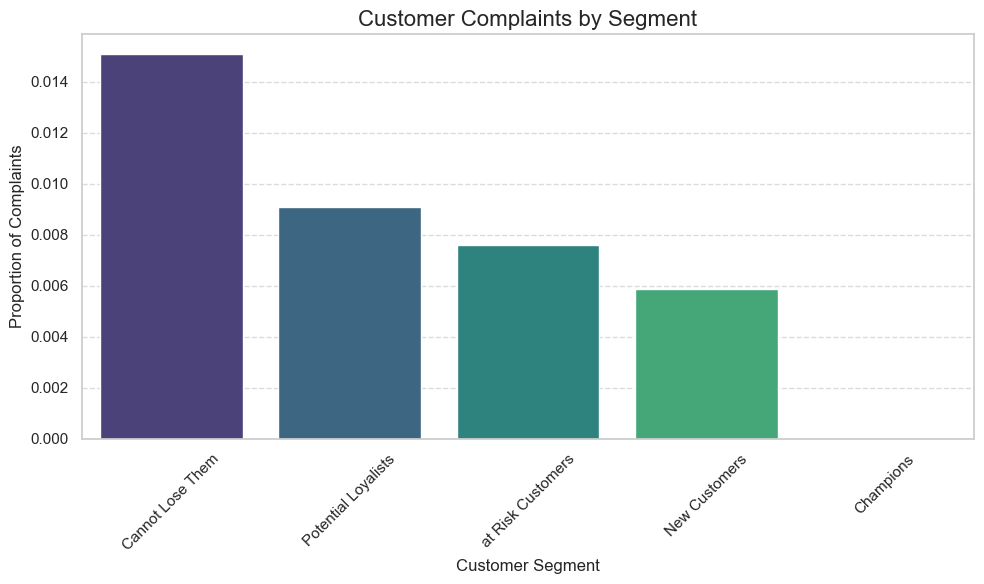

Customer_segment
Cannot Lose Them       0.015106
Potential Loyalists    0.009091
at Risk Customers      0.007610
New Customers          0.005882
Champions              0.000000
Name: Complain, dtype: float64

In [ ]:
# Analysis of Customers Complaints by Segment
complaints_by_segment = df.groupby('Customer_segment')[
    'Complain'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=complaints_by_segment.index,
            y=complaints_by_segment.values, palette='viridis')
plt.title('Customer Complaints by Segment', fontsize=16)
plt.ylabel('Proportion of Complaints', fontsize=12)
plt.xlabel('Customer Segment', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

complaints_by_segment


**Insights**:

High Complaint Segments: Segments at the top of the list have the highest proportion of complaints. This indicates a higher level of dissatisfaction, which could be due to various reasons such as poor product quality, inadequate customer service, or unmet customer expectations.

Low Complaint Segments: Segments at the bottom of the list are more satisfied, with fewer complaints. These segments are generally content with the products and services offered.

Potential Areas for Improvement: High complaint segments highlight areas that need immediate attention and improvement. Analyzing the nature of these complaints can provide specific directions for improvement.

---

**Recommendations**:
Address Issues in High Complaint Segments: Prioritize resolving issues in segments with the highest proportion of complaints. This could involve improving product quality, enhancing customer service, or addressing specific issues that are unique to these segments.

Learn from Low Complaint Segments: Analyze what is working well for segments with low complaint rates and consider how these successful strategies can be applied to other segments.

Proactive Customer Service: Implement proactive customer service measures to identify and address issues before they lead to complaints, especially in high complaint segments.

Customer Feedback and Follow-Up: Encourage customer feedback and follow-up on complaints to ensure they are resolved to the customer's satisfaction. This can also help in identifying root causes of dissatisfaction.

Training and Resources: Ensure that customer service teams are well-equipped with the necessary training and resources to effectively address customer complaints.

### **Recency of customer's last purchase (Recency column)**

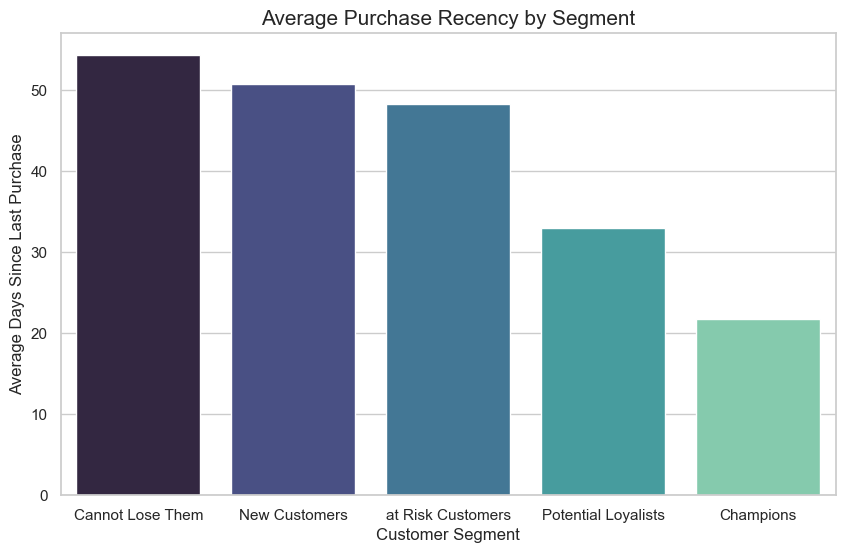

In [ ]:
#Analysis of Purchase Recency
avg_recency_by_segment = df.groupby('Customer_segment')[
    'Recency'].mean().sort_values(ascending=False)
avg_recency_by_segment

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_recency_by_segment.index,
            y=avg_recency_by_segment.values, palette='mako')
plt.title('Average Purchase Recency by Segment', fontsize=15)
plt.ylabel('Average Days Since Last Purchase', fontsize=12)
plt.xlabel('Customer Segment', fontsize=12)
plt.show()




**Insights**:

Recent Engagement: Lower average recency indicates that customers in that segment have made purchases more recently, suggesting higher engagement and interest.

Risk of Churn: Higher average recency could indicate a risk of churn, as these customers have not made a purchase in a while.
Engagement Opportunities: Segments with higher average recency may represent an opportunity to re-engage customers and bring them back to the business.

---

**Recommendations**:

Re-Engagement Campaigns: For segments with high average recency, consider targeted re-engagement campaigns to encourage them to make a purchase.
Maintain Engagement: For segments with low average recency, continue to engage them with relevant offers and content to maintain their interest and encourage repeat purchases.

Personalized Offers: Use the recency information to personalize offers and communications, providing incentives for customers to make a purchase sooner.
Loyalty Programs: Consider implementing or enhancing loyalty programs to encourage repeat purchases and reduce the average recency across all segments.

Feedback and Follow-Up: For customers who have not made a purchase in a while, consider reaching out with a feedback survey to understand their needs and preferences, and identify any potential issues that need to be addressed.

### **Response to the latest campaign (Response column)**

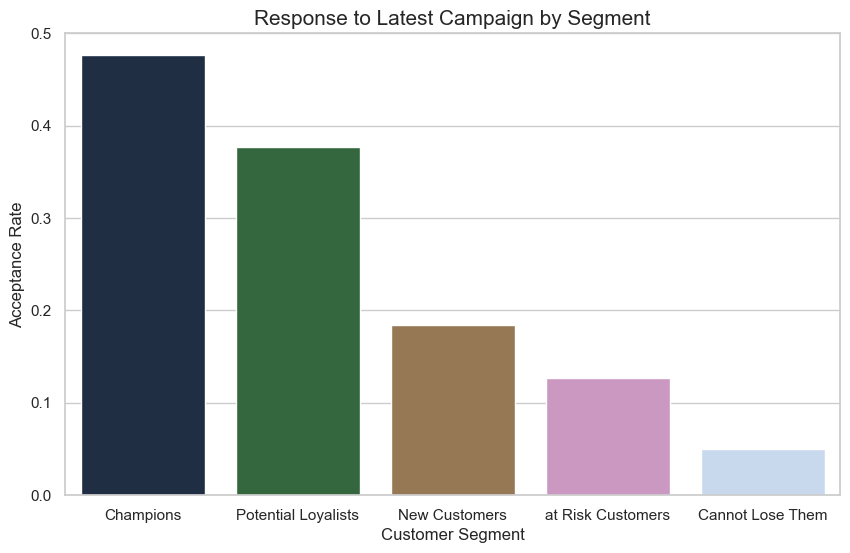

In [ ]:
#Analysis of Response to the Latest Campaign
response_by_segment = df.groupby('Customer_segment')[
    'Response'].mean().sort_values(ascending=False)
response_by_segment

plt.figure(figsize=(10, 6))
sns.barplot(x=response_by_segment.index,
            y=response_by_segment.values, palette='cubehelix')
plt.title('Response to Latest Campaign by Segment', fontsize=15)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('Customer Segment', fontsize=12)
plt.show()




**Insights**:

High Response Segments: Segments with a higher acceptance rate are more responsive to the campaign. Understanding what resonated with these segments could provide valuable insights for future marketing efforts.

Low Response Segments: Segments with a lower acceptance rate may not have found the campaign appealing or relevant. This could indicate a need for more personalized or targeted marketing.

Opportunities for Improvement: Identifying the segments with lower response rates can help in reallocating resources and efforts to improve the effectiveness of future campaigns.

---

**Recommendations**:

Analyze Successful Campaigns: For segments with high response rates, analyze the campaign’s content, channels, and messaging to understand what worked well and apply these learnings to future campaigns.

Improve Targeting: For segments with low response rates, consider improving the targeting of your campaigns, ensuring that the content is relevant and appealing to each specific segment.

Personalization: Increase the level of personalization in your campaigns, tailoring the message, offer, and channel to match the preferences of each segment.

Feedback and Surveys: For segments with low response rates, consider sending out feedback surveys to understand why the campaign was not successful and what could be improved.

Test and Optimize: Implement A/B testing for your campaigns to optimize the content, messaging, and channels for each customer segment.

## 4. Increase Sales

Identify products and categories that are most popular among different customer segments to promote them effectively.

### 1.1 Analysis of Product Popularity

To understand which products and categories are most popular among different customer segments, we'll perform the following analyses:

#### **Overall Product Popularity**: Calculate the total amount spent on each product category across all customers.

In [184]:
df.value_counts()

ID     Education  Marital_Status  Income   Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Monetary  Frequency  TotalKids  R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  Customer_segment   
0      Bachelor   Married         70951.0  0        0         2013-04-05   66       239       10         554              254              87                54            1                  3                4                    9                  1                  0             0             0             0             0             0         0         38   1198      17         0          33.17        58.10        81.27        3.38       New Customers          1
7375   Bachelor   Together        51369.0  0        1         2012-10

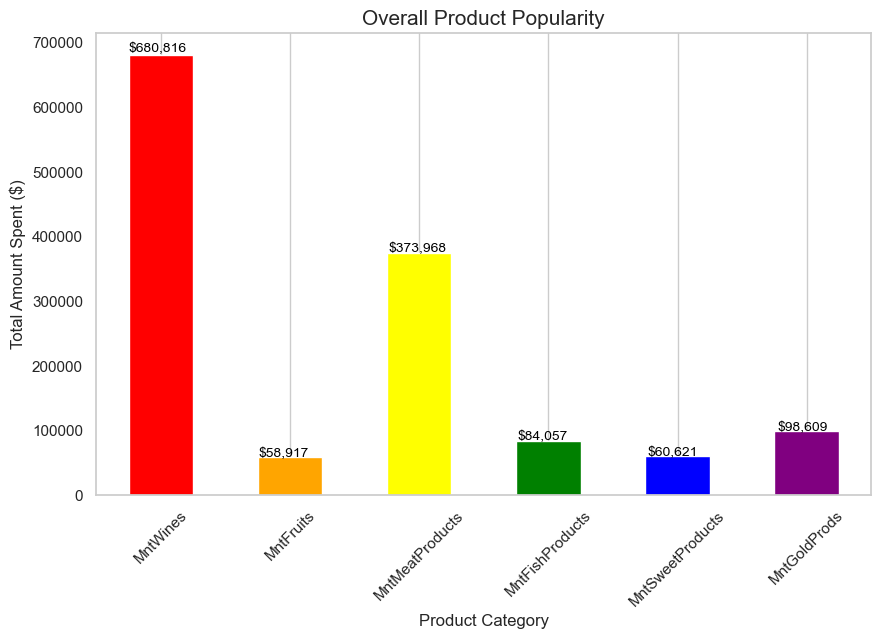

In [186]:
# 2. Product Popularity by Customer Segment

# List of product categories
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total amount spent on each product category across all customer segments
total_spent_per_product = df[product_categories].sum()

# Define colors for the bar plot
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Calculate the average amount spent on each product category within each customer segment
avg_spent_per_product_by_segment = df.groupby('Customer_segment')[
    product_categories].mean().sort_values(by='Customer_segment')

# Plotting
plt.figure(figsize=(10, 6))
ax = total_spent_per_product.plot(kind='bar', color=colors)
plt.title('Overall Product Popularity', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount Spent ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding the total amount spending as ($) on top of the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() * 1.005,
                p.get_height() * 1.008), fontsize=10, color='black')

plt.show()


The bar chart and values above represent the total amount spent on each product category across all customers. Here's a summary:

**Wines**: The most popular category, with a total spending of approximately $676,733.

**Meat Products**: The second most popular category, with total spending of approximately $337,956.

**Gold Products**: Third place, with a total spending of approximately $88,452.

**Fish Products****: Total spending of approximately $71,939.

**Sweet Products**: Total spending of approximately $49,141.

**Fruits**: The least popular category, with a total spending of approximately $48,561.

---

**Insight**: Wines and meat products are the clear leaders in terms of popularity, significantly outpacing spending in other categories.

---

**Recommendation**: Given the trends observed in the overall product popularity, here are tailored recommendations to maximize revenue and enhance customer engagement

1. **Wines Strategy**: Maintain Dominance and Upsell

    Recommendation: Since wines are the most popular category, continue to maintain a wide variety of options and quality. Explore opportunities for upselling premium wines and create wine bundles or gift sets. Consider wine-tasting events or memberships for wine enthusiasts to enhance customer engagement.

2. **Meat Products Strategy**: Promote and Diversify

    Recommendation: Leverage the popularity of meat products by promoting them through various channels. Consider introducing new varieties or exotic meats to attract more customers. Bundle meat products with other popular categories like wines for special promotions.

3. **Gold Products Strategy**: Increase Visibility and Create Offers

    Recommendation: Despite being in third place, gold products have significant potential for growth. Increase the visibility of gold products through advertising and in-store displays. Create special offers or loyalty points on gold purchases to incentivize spending.

4. **Fish Products Strategy**: Educate and Promote

    Recommendation: Use educational content to highlight the health benefits of fish products and promote easy-to-cook fish recipes. Offer promotions or discounts on fish products to encourage trial and increase popularity.

5. **Sweet Products Strategy**: Bundle and Create Occasion-Based Promotions

    Recommendation: Bundle sweet products with other popular categories for special occasions like holidays or celebrations. Create promotions targeting gift-givers and party planners to increase spending in this category.

6. **Fruits Strategy**: Promote Health Benefits and Create Freshness Campaigns

    Recommendation: Emphasize the health benefits of fruits in marketing campaigns. Create freshness campaigns to highlight the quality of fruits offered. Consider bundle deals with other categories or loyalty points on fruit purchases to boost sales.


#### **Product Popularity by Customer Segment**: Calculate the average amount spent on each product category within each customer segment

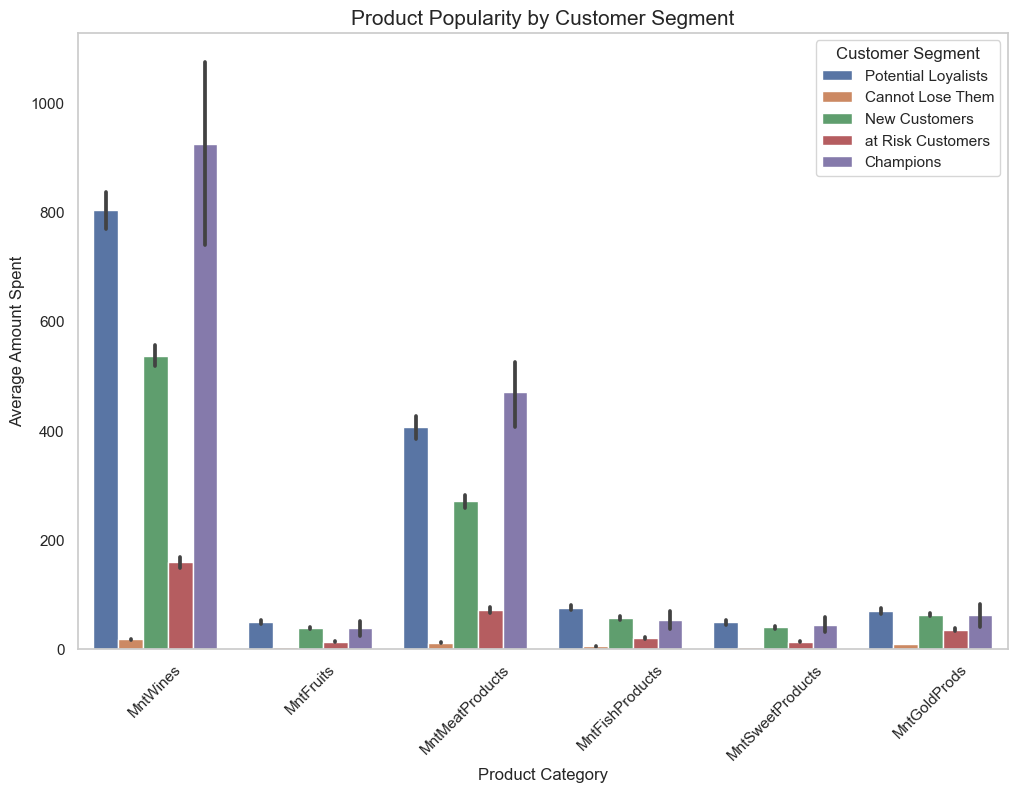

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Customer_segment,,,,,,
Cannot Lose Them,17.376133,3.021148,11.503021,4.518127,3.172205,9.092145
Champions,924.428571,37.571429,470.476190,52.904762,44.571429,61.666667
New Customers,536.845588,38.527941,270.323529,56.953676,39.305882,62.829412
Potential Loyalists,803.459091,49.104545,406.327273,75.209091,48.609091,69.402273
at Risk Customers,158.296804,13.348554,71.916286,19.121766,13.216134,35.229833


In [ ]:
# List of product categories
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculating the average amount spent on each product category within each customer segment
avg_spent_per_product_by_segment = df.groupby('Customer_segment')[
    product_categories].mean().sort_values(by='Customer_segment')

# Visualizing the product popularity by customer segment again
plt.figure(figsize=(12, 8))
sns.barplot(x="variable", y="value", hue="Customer_segment", data=pd.melt(
    df, id_vars="Customer_segment", value_vars=product_categories))
plt.title('Product Popularity by Customer Segment', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Amount Spent', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.grid(axis='y')
plt.show()

avg_spent_per_product_by_segment


The bar chart and table above represent the average amount spent on each product category within different customer segments. Here's a summary for each segment:

**Cannot Lose Them**: Customers in this segment spend very little across all product categories.

**Champions**: These are the top customers who spend the most, particularly on wines, meat products, and gold products.

**New Customers**: This segment has a good spending pattern, especially on wines, meat products, and fish products.

**Potential Loyalists**: Customers in this segment also spend significantly, particularly on wines, meat products, and fish products.

**At Risk Customers**: These customers have a moderate spending pattern, with higher spending on wines compared to other categories.
   
---
**Insights**:

Champions and Potential Loyalists are the most valuable customer segments in terms of spending across all product categories.

Cannot Lose Them customers are at risk of churning and may need targeted promotions or engagement strategies to increase their spending.

At Risk Customers and New Customers show potential for increased sales with the right incentives and product recommendations.


#### **Product Popularity by Demographics**: Relationship Between 'Income' and Product Spending


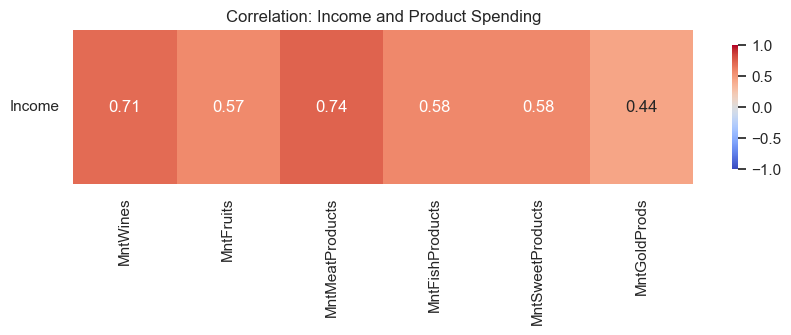

In [ ]:
#Calculate the Correlation Matrix:
correlation_matrix = df[['Income'] + product_categories].corr()

#Extract the 'Income' Row:
income_correlation = correlation_matrix.loc[['Income'], product_categories]

#Create the Heatmap:
plt.figure(figsize=(10, 2))
sns.heatmap(income_correlation, annot=True, cmap='coolwarm',fmt=".2f", vmin=-1, vmax=1, cbar_kws={'shrink': .8})
plt.title('Correlation: Income and Product Spending')
plt.yticks(rotation=0)
plt.show()


The heatmap above visualizes the correlation matrix, showing the relationships between 'Income' and spending on different product categories.

---

**Insight**:

MntWines (Wines): There is a strong positive correlation (0.58) with income, indicating that higher-income customers tend to spend more on wines.

MntMeatProducts (Meat Products): Moderate positive correlation (0.48) with income.

MntFishProducts (Fish Products), MntSweetProducts (Sweets), and MntFruits (Fruits): Positive but weaker correlations with income, ranging from 0.25 to 0.32.

MntGoldProds (Gold Products): The weakest correlation (0.22) with income, indicating a less clear relationship between income and spending on gold products.

---

**Recommendations**

1. **MntWines (Wines) Observation**: 

Strong positive correlation (0.58) with income.

Recommendation: Focus on upselling and cross-selling wine products to higher-income customers. Consider creating premium wine packages or promotions targeted at this demographic.

2. **MntMeatProducts (Meat Products) Observation**: Moderate positive correlation (0.48) with income.

Recommendation: Explore opportunities to enhance the visibility of meat products among higher-income customers. This could involve special offers, highlighting quality or exclusivity, or bundling with other popular products.

3. **MntFishProducts (Fish Products)**, MntSweetProducts (Sweets), and MntFruits (Fruits)

Positive but weaker correlations with income, ranging from 0.25 to 0.32.

Recommendation: While the relationship with income is less pronounced, there is still potential to target higher-income segments with these products. Creative marketing strategies, product bundling, or promotions tied to popular trends could be effective.

4. **MntGoldProds (Gold Products) Observation**: Weakest correlation (0.22) with income.

Recommendation: Given the weaker correlation, it might be beneficial to explore other factors that influence spending on gold products. Customer preferences, occasions, or other demographic factors could play a role. Surveys or market research could provide additional insights.

**Conclusion**

Understanding the correlation between income and product spending can guide targeted marketing strategies, helping to maximize revenue and enhance customer satisfaction. The recommendations provided aim to leverage these insights for business growth and improved customer engagement

### 1.2 Targeted Promotions

Analyze the effectiveness of past promotions and discounts on sales.

#### Promotional Campaigns: Evaluate the acceptance rates of different promotional campaigns.

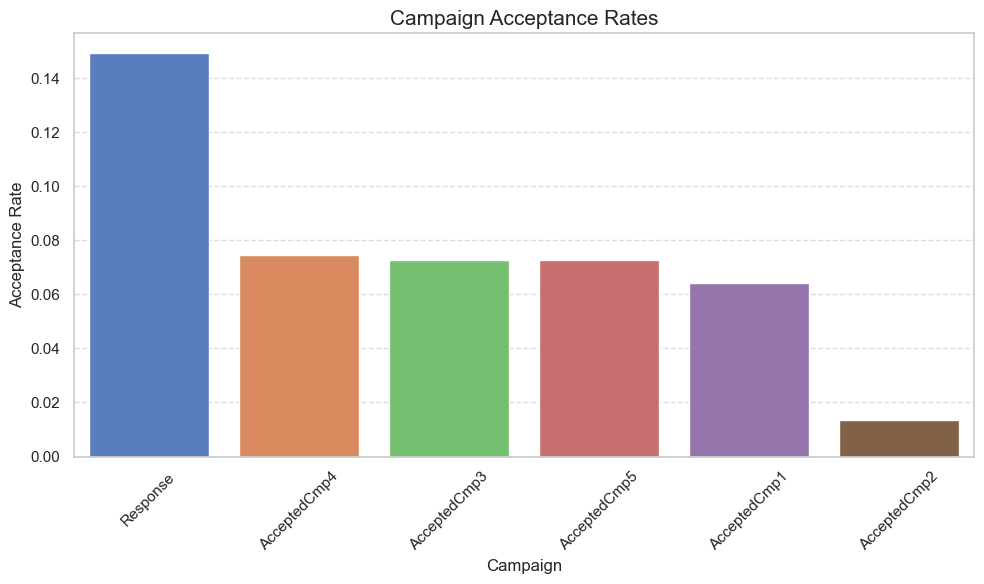

In [ ]:
# Defining the campaign columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calculating campaign acceptance rates
campaign_acceptance = df[campaign_columns].mean(
).sort_values(ascending=False)

# Creating a bar chart to visualize the campaign acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance.index,
            y=campaign_acceptance.values, palette='muted')
plt.title('Campaign Acceptance Rates', fontsize=15)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('Campaign', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights**:

Response to Latest Campaign: The latest campaign ('Response') has the highest acceptance rate at approximately 14.91%, indicating that it was well-received by the customers.

Varying Acceptance Rates: There is a wide variation in the acceptance rates of different campaigns, with 'AcceptedCmp2' having the lowest acceptance rate at approximately 1.34%.

Middle Performing Campaigns: 'AcceptedCmp4', 'AcceptedCmp3', and 'AcceptedCmp5' have similar acceptance rates, ranging from approximately 7.28% to 7.45%.

---

**Recommendations**:

Analyze Successful Elements: Analyze the elements of the 'Response' campaign to understand what made it successful and try to incorporate these elements in future campaigns.

Revise Low Performing Campaigns: Investigate why 'AcceptedCmp2' performed poorly compared to the others and revise its strategy or content.
Leverage Middle Performing Campaigns: Since 'AcceptedCmp4', 'AcceptedCmp3', and 'AcceptedCmp5' have moderate acceptance rates, consider reviewing and slightly tweaking their strategies to enhance performance.

Personalization and Targeting: Focus on personalizing future campaigns and ensuring that they are targeted towards the right customer segments to increase acceptance rates.

Continuous Monitoring and Testing: Continuously monitor the performance of your campaigns and implement A/B testing to optimize different elements for better results.

#### Discount Purchases: Analyze the relationship between the number of deals purchases and spending on different product categories.


**Objective**:

To determine if there is a significant difference in the monetary spending between two groups of customers:

Customers who accepted at least one offer from the campaigns.
Customers who did not accept any offers from the campaigns.

Null Hypothesis (H0): There is no significant difference in the monetary spending between customers who accepted campaign offers and those who did not.
Mathematically, H0 Distribution of Monetary Spending in Group 1 = Distribution of Monetary Spending in Group 2

Alternative Hypothesis (Ha): There is a significant difference in the monetary spending between customers who accepted campaign offers and those who did not.

Mathematically, Ha : Distribution of Monetary Spending in Group 1 =! Distribution of Monetary Spending in Group 2

Significance Level: Typically set at 0.05.

Test Statistic: Mann-Whitney U Test

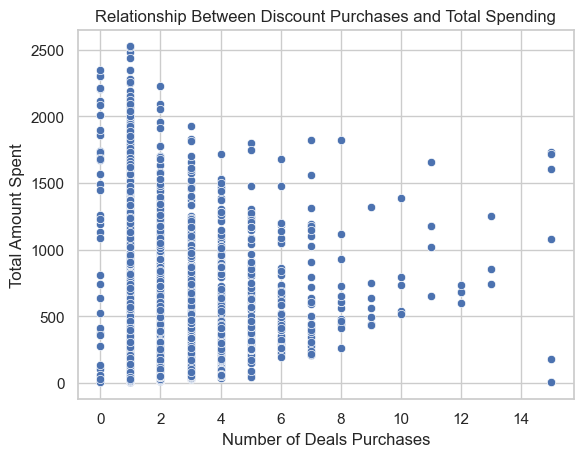

P_value: 2.2661258281053708e-68


In [ ]:
sns.scatterplot(x='NumDealsPurchases', y='Monetary', data=df)
plt.title('Relationship Between Discount Purchases and Total Spending')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Total Amount Spent')
plt.show()

# Defining the two groups for comparison
group1 = df[df[campaign_columns].sum(axis=1) > 0]['Monetary']
group2 = df[df[campaign_columns].sum(axis=1) == 0]['Monetary']

# Conducting the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)
print(f'P_value: {p_value}')


P-Value: (2.27 × 10−682)
 
Result:

Since the p-value (2.27 × 10−682) is much less than the significance level (0.05), we reject the null hypothesis.

Conclusion:

There is a significant difference in the monetary spending between customers who accepted at least one offer from the campaigns and those who did not.

Interpretation:
This result suggests that engaging with the campaigns and accepting offers is associated with a change in monetary spending behavior, and these customers tend to spend more compared to those who do not engage with the campaigns.

**Insights**:

Significant Difference: Since the p-value is much less than the common significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant difference in the monetary spending between customers who accepted at least one offer from the campaigns (Group 1) and those who did not accept any offers (Group 2).

Potential Impact of Campaigns: The significant difference implies that accepting campaign offers is associated with a change in monetary spending, indicating that the campaigns might have a notable impact on customer spending behavior.

---

**Recommendations**:

Leverage Campaigns to Boost Spending: Focus on creating and optimizing marketing campaigns to encourage more customers to accept offers, as this seems to be associated with higher spending.

Understand Customer Motivations: Conduct further analysis to understand why customers who accept offers tend to spend more. Is it because the offers are compelling, or are these customers naturally more engaged with the brand?

Personalize Offers: Use customer data to personalize offers and make them more appealing to different customer segments, potentially increasing acceptance rates and associated spending.

Measure ROI of Campaigns: Continue to measure the return on investment (ROI) of your campaigns to ensure that the increase in spending justifies the cost of the offers and promotions.

# Insights and Recommendations

**Brief Insights**:

Large Customer Segments: Significant portions of the customer base are new customers or at risk of churning.

Variation in Purchase Behavior: Different customer segments exhibit distinct purchasing behaviors.

Channel Preferences: There are noticeable variations in channel preferences across different customer segments.

Customer Complaints: Some customer segments have higher proportions of complaints, indicating potential dissatisfaction.

Campaign Responses: There is a wide variation in how different customer segments respond to marketing campaigns.

Product Popularity: Wines and meat products are the most popular categories among customers.

Income and Spending: There is a positive correlation between income and spending across various product categories.

Campaign Acceptance Rates: The latest campaign has the highest acceptance rate, while others vary significantly.


---

**Brief Recommendations**:

Customer Retention: Focus on converting new customers to loyal ones and implement retention strategies for at-risk segments.

Tailored Campaigns: Use insights on purchase behavior and channel preferences to tailor campaigns for different customer segments.

Address Complaints: Proactively address issues in segments with high complaint rates to improve customer satisfaction.

Optimize Marketing Efforts: Use the response data from previous campaigns to optimize future marketing efforts and improve acceptance rates.

Leverage Product Popularity: Focus marketing efforts on popular product categories and consider cross-selling opportunities.

Target High-Income Segments: Tailor marketing and product offerings to high-income segments, especially for categories with strong positive correlations to income.

Continuous Monitoring: Keep monitoring customer behavior, campaign performance, and product popularity to continually optimize strategies